# Automated Customized Deep Neural Network

If you have ever wanted to build a model using deep learning, you have encountered the big question of how many layers I should use? or what should be the size of this layers?

Using `tensorlfow` or even `keras` sequential model makes it harded to simply add one or multiple layer. You need to modify a the code before each run or you need to write different blocks of code for models with various number of layers. However, `keras` functional api makes it easy to use a for loop and add as many layers as you like in few lines of code. Using this feature, I constructed five classes of deep architecture startin from a simple dense fully-connected deep network to a complex hybrid convolutional autoencoder. 

The classes are initiated given the number of nodes in each layer or the type of each layer and then they build the desired model and makes them ready for you to train and test.

For simplicity, other parameters like activation functions, optimizer, loss, etc. are hard-coded. I chose them based on what is usually used in a similar network. But if you like, you can add them to you class init params and even play with those as well. I used `adam` optimizer for all of the classes and `categorical_crossentropy` and `mse` for losses. I also add a dropout layer right after the input layer and after the encoded layer if there's any. The default value of the `dropout` is 0.0001 and mainly I used it for simplicity in my coding and for loop.

First, I go over each class and give and example of the usage of it. 
At last, I will bring and example of training few DNNs with different number of nodes and layers to compare them when training a classifier for MNIST digit dataset.

If you are not familiar with neural networks and you don't any knowledge on the topic please use google and learn the basic concept before you dive into this library :)

## 1. Deep Neural Networks
A Deep Neural Network is built of an input layer, a bunch of hidden layers and and output layers which can be the result of classification or in some cases the result of regression (note that each case should use it's specific loss function)

Below is a simple illustration of a DNN:

![DNN](figures/DNN.png "DNN")

The class I designed is used for classification with relu actication function for all the hidden layers and sigmoid for the final output layer. You can initiate your model by giving a list of integers which contain the number of nodes in each layer including your input and output layers! Yeah! It's just that easy to make any simple deep network.

Let's say your input has 784 feature(this is actually the number of pixels in MNIST digit data which are 28x28 images), you have 10 classes (cause there are 10 digits), and you want to have a layer with 256 nodes right after the input and another layer with 32 nodes after that. Just look at the example below and follow it:

In [1]:
from neural_networks import DNN

In [2]:
dnn_model = DNN(layer_size=[784, 256, 32, 10])
dnn_model.print_summary()

Model: "deep_neural_network"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 32)                8224      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 209,514
Trainable params: 209,514
Non-trainable params: 0
_________________________________________________________________


## 2. Autoencoders

Autoencoders are mostly use when you don't have label for your data. The purpose is to shrink your giant input to a more abstract representation. The model is train in a way that the encoded input carries enough information so that it can reconstruct the original input as close as possible. 

Below is a simple illustration of an AE :

![AE](figures/AE.png "AE")

The autoencoder I designed, uses relu activation function for all layers. For building your desired autoencoder, you just need to input a list of integers containing the number of nodes in each layer from the input layer to the encoded input layer (the middle part) the class will automatically mirror this setting for the decoder part. 

Let's say you want to create an autoencoder to shrink your MNIST data into 32 features. And you want to have another hidden layer in between of the input and encoded space with 256 nodes. So you entire autoencoder will have the following number of nodes in this order: 784, 256, 32, 256, 784. You just need to provide a list containing [784, 256, 32] just like the example below:

In [3]:
from neural_networks import AE

In [4]:
dnn_model = AE(encoder_layer_size=[784, 256, 32])
dnn_model.print_summary()

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dropout (Dropout)            (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_4 (Dense)              (None, 32)                8224      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               8448      
_________________________________________________________________
dense_6 (Dense)              (None, 784)               

This class provides two models: 
1. Autoencoder: which gives you the reconstructed input
2. Encoder: which provides the encoded features

## 3. Hybrid Neural Networks

We are getting to the fun parts! When data is labeled and you are looking for dimension reduction, with neural networks you can build a hybrid network that can act as both an autoencoder and a classifier. After you build your decoder block you can also take another branch from the encoded data and connect it to the output layer indicating class labels. Keras functional api will let you to have multiple outputs and have separate appropriate loss functions for each of them.

Take a look at this figure for better understanding the base architecture of a hybrid network:

![HNN](figures/HNN.png "HNN")

You can train and fine tune this model in a way to reduce the mse for reconstructed input and reduce categorical cross entropy for the classification output layer.

Now assume that you want to build an autoencoder same as previous section, but you also have labeled data and you want to classifiy it in 10 groups. Below is an example of how to use HNN class to create this network:


In [5]:
from neural_networks import HNN

In [6]:
dnn_model = HNN(encoder_layer_size=[784, 256, 32], num_classes=10)
dnn_model.print_summary()

Model: "hybrid_neural_network"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 784)]        0                                            
__________________________________________________________________________________________________
dropout_2 (Dropout)             (None, 784)          0           input_3[0][0]                    
__________________________________________________________________________________________________
dense_7 (Dense)                 (None, 256)          200960      dropout_2[0][0]                  
__________________________________________________________________________________________________
dense_8 (Dense)                 (None, 32)           8224        dense_7[0][0]                    
______________________________________________________________________________

## 4. Convolutional Neural Networks

These types of networks are used when the neighbors of each single feature, also carry information about that feature. By looking and windows of feature, you can extract more information and benefit from their relation.

In the figure below, you can see how we can start from a 2-D data (for example an image) and use a convolution kernel to shrink it to a smaller 2-D data and finally by flattening that we can connect it to the output layer for classification purposes.

![CNN](figures/CNN.jpg "CNN")

If you are familiar with CNNs you should know that we have different types of layers including convolutional(c), maxpooling(m), dense(d), upsampling(u), ... Therefore, in this class you need to also give a list of layer types when you are initiating the network. 

Let's say you want to create a CNN with the following order of layers with kernel size of 10 for all convolutional layers:

1. Input: 28x28 (MNIST digit)
2. Convolutional layer: 64 filters
3. Maxpooling layer: pool size 2x2
4. Convolutional layer: 16 filters
5. Maxpooling layer: pool size 2x2
6. Dense layer: 32 nodes
7. Dense ouput layer: 10 nodes (cause there are 10 digits)

You can use the following code to build this network:


In [7]:
from neural_networks import CNN

In [8]:
cae_model = CNN(input_dim=(28,28,1), layers='cmcmdd' , layers_param=[64,2,16,2,32,10], kernel_size=10)
cae_model.print_summary()

Model: "cnn"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 64)        6464      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 16)        102416    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 784)               0       

# Exprtiments

Now let's get to work and see how we can actually benefit from this library. I will only provide an example for DNN but you can use other classes in the same fashion.

I want to train a classifier for MNIST digit data, but I don't know what number of layers with how many nodes I should choose. I can easily create a bunch of different settings and create/train different models and compare them with each other.

In [15]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import keras
from keras import backend as K 
from keras.datasets import mnist
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from termcolor import colored

## 1. Load MNIST digit data

In [22]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

## Select fewer samples to make it more challenging

In [23]:
x_train = x_train[:500,:]
x_test = x_test[:100,:]
y_train = y_train[:500]
y_test = y_test[:100]
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(500, 784) (500,)
(100, 784) (100,)


### Convert labels to one_hot_vector format

In [24]:
one_hot_y_train = OneHotEncoder().fit_transform(y_train.reshape(len(y_train),1)).toarray()
one_hot_y_test = OneHotEncoder().fit_transform(y_test.reshape(len(y_test),1)).toarray()

## 2. Build, train, and evaluate models

In [25]:
models_layers = [[784, 32, 10],
                 [784, 64, 32, 10], 
                 [784, 128, 64, 32, 10], 
                 [784, 256, 128, 64, 32, 10], 
                 [784, 512, 256, 128, 64, 32, 10]]

---------------------------------------------------------------------------------------
Training model with the following configuration:  [784, 32, 10]
Model: "deep_neural_network"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________
Accuracy for this model is: %37


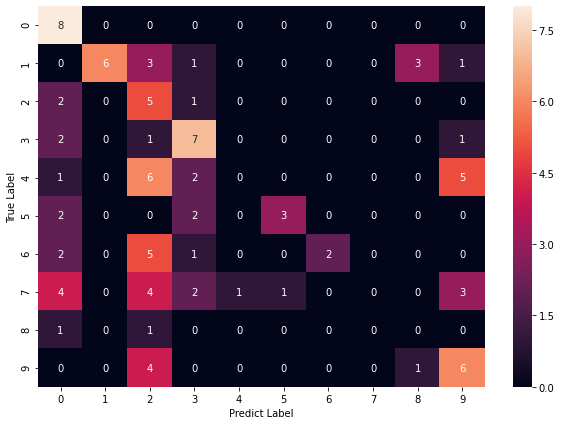

---------------------------------------------------------------------------------------
Training model with the following configuration:  [784, 64, 32, 10]
Model: "deep_neural_network"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________
Accuracy for this model is: %44


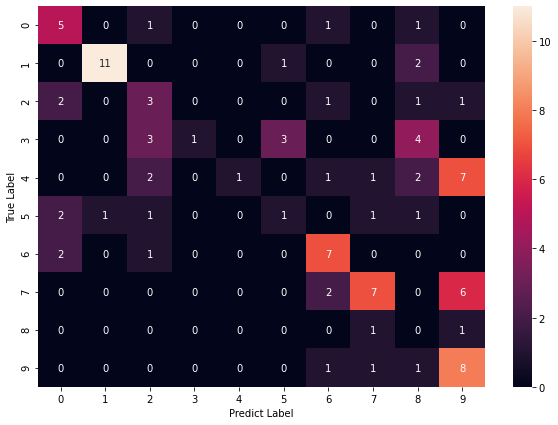

---------------------------------------------------------------------------------------
Training model with the following configuration:  [784, 128, 64, 32, 10]
Model: "deep_neural_network"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                330       
Total params: 111,146
Trainable params: 111,146
Non-trainable params: 0
____________

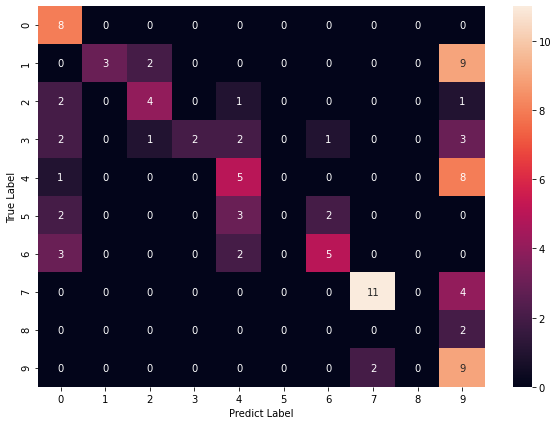

---------------------------------------------------------------------------------------
Training model with the following configuration:  [784, 256, 128, 64, 32, 10]
Model: "deep_neural_network"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dens

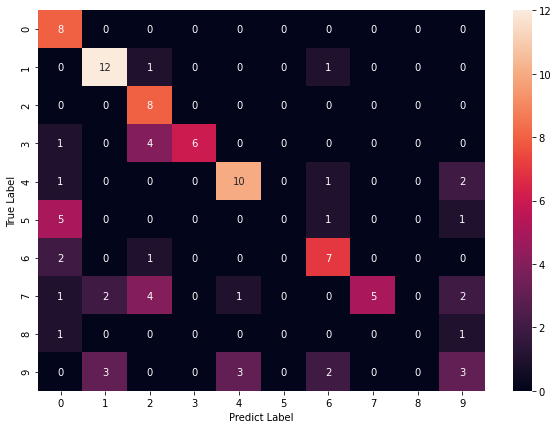

---------------------------------------------------------------------------------------
Training model with the following configuration:  [784, 512, 256, 128, 64, 32, 10]
Model: "deep_neural_network"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 

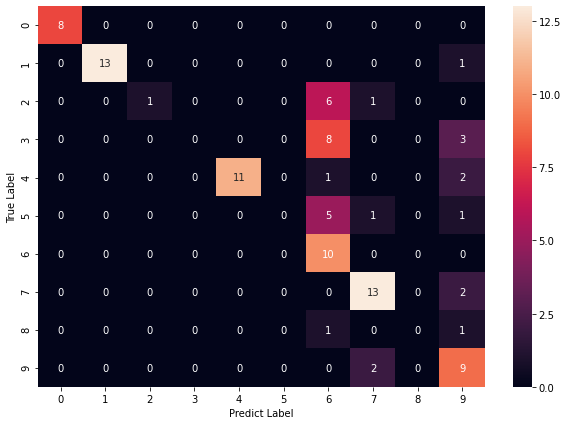

In [30]:
for model in models_layers:
    
    print('---------------------------------------------------------------------------------------')
    print('Training model with the following configuration: ', colored(model,'blue'))
    K.clear_session() # this will clear previous models from the history
    dnn_model = DNN(layer_size=model)
    dnn_model.print_summary()
    dnn_model.dnn_model.fit(x_train,one_hot_y_train,
                            epochs=5,
                            batch_size=256,
                            validation_split=0.3,
                            verbose=0)
    predict_probabilities = dnn_model.dnn_model.predict(x_test)
    y_predict_classes = np.argmax(predict_probabilities, axis=1)
    print(colored(('Accuracy for this model is: %' + str(int(accuracy_score(y_test, y_predict_classes)*100))), 'green'))
    
    plt.figure(figsize=(10,7))
    ax = sns.heatmap(confusion_matrix(y_test,y_predict_classes), annot=True)
    ax.set(xlabel='Predict Label', ylabel='True Label')
    plt.show()
